# Model Schemas from PyTorch Summary

Notebook ini menampilkan skema arsitektur GAN, CTGAN, Conditional WGAN-GP, dan Autoencoder **berdasarkan output PyTorch Summary**.
Jika `torchinfo` belum terpasang, instal dengan `pip install torchinfo` terlebih dahulu.

In [8]:
import os
import sys
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

try:
    from torchinfo import summary
except Exception as e:
    summary = None
    print('torchinfo not available:', e)

# Add project root to Python path
# In Jupyter notebook, get the parent directory of the notebooks folder
project_root = os.path.dirname(os.getcwd())
sys.path.insert(0, project_root)

from model.pytorch_gan import Generator, Discriminator
from model.pytorch_ctgan import CTGANGenerator, CTGANDiscriminator
from model.pytorch_cond_wgan import ConditionalGenerator, PacDiscriminator
from model.pytorch_autoencoder import Autoencoder

def plot_summary_flow(sum_obj, title):
    layers = []
    for item in getattr(sum_obj, 'summary_list', []):
        if getattr(item, 'is_leaf_layer', False):
            layers.append(item)

    if not layers:
        print('No layers to plot for', title)
        return

    fig, ax = plt.subplots(figsize=(12, 3))
    ax.set_title(title)
    ax.axis('off')

    x = 0.2
    y = 0.4
    w = 1.6
    h = 0.4
    gap = 0.2

    for layer in layers:
        name = getattr(layer, 'layer_name', 'layer')
        out_size = getattr(layer, 'output_size', '')
        label = f"{name}\n{out_size}"
        rect = Rectangle((x, y), w, h, facecolor='#F3F5F7', edgecolor='#333333')
        ax.add_patch(rect)
        ax.text(x + w/2, y + h/2, label, ha='center', va='center', fontsize=8)
        x += w + gap

    ax.set_xlim(0, x + 0.2)
    ax.set_ylim(0, 1.2)
    plt.show()


## GAN (Generator & Discriminator)

Layer (type:depth-idx)                   Output Shape              Param #
Generator                                [1, 32]                   --
├─Sequential: 1-1                        [1, 32]                   --
│    └─Linear: 2-1                       [1, 128]                  12,928
│    └─BatchNorm1d: 2-2                  [1, 128]                  256
│    └─ReLU: 2-3                         [1, 128]                  --
│    └─Linear: 2-4                       [1, 256]                  33,024
│    └─BatchNorm1d: 2-5                  [1, 256]                  512
│    └─ReLU: 2-6                         [1, 256]                  --
│    └─Linear: 2-7                       [1, 128]                  32,896
│    └─BatchNorm1d: 2-8                  [1, 128]                  256
│    └─ReLU: 2-9                         [1, 128]                  --
│    └─Linear: 2-10                      [1, 32]                   4,128
Total params: 84,000
Trainable params: 84,000
Non-trainable params:

Layer (type:depth-idx)                   Output Shape              Param #
Discriminator                            [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 128]                  4,224
│    └─LeakyReLU: 2-2                    [1, 128]                  --
│    └─Dropout: 2-3                      [1, 128]                  --
│    └─Linear: 2-4                       [1, 64]                   8,256
│    └─LeakyReLU: 2-5                    [1, 64]                   --
│    └─Dropout: 2-6                      [1, 64]                   --
│    └─Linear: 2-7                       [1, 1]                    65
│    └─Sigmoid: 2-8                      [1, 1]                    --
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB):

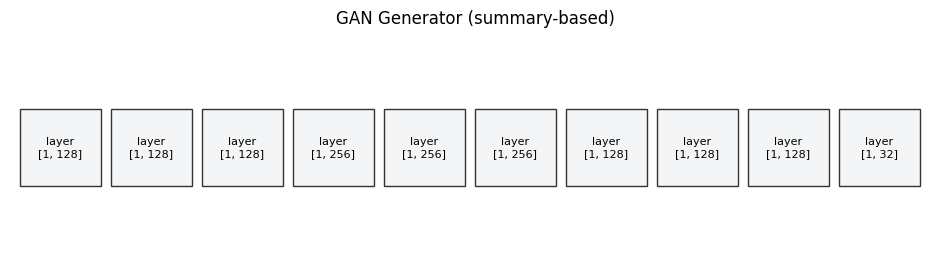

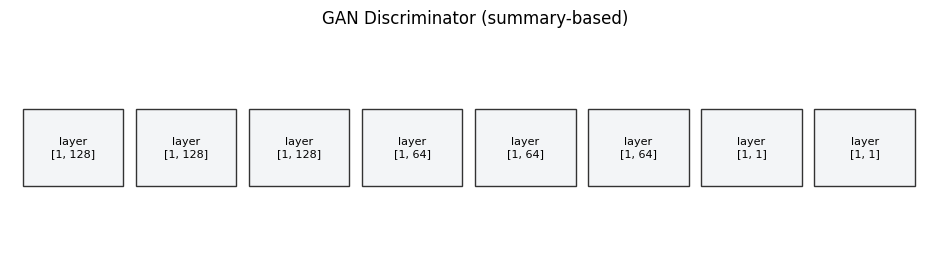

In [9]:
if summary is None:
    print('Install torchinfo to run summaries.')
else:
    noise_dim = 100
    data_dim = 32
    gen = Generator(noise_dim, data_dim)
    disc = Discriminator(data_dim)

    gen_sum = summary(gen, input_size=(1, noise_dim), verbose=0)
    disc_sum = summary(disc, input_size=(1, data_dim), verbose=0)

    display(gen_sum)
    display(disc_sum)

    plot_summary_flow(gen_sum, 'GAN Generator (summary-based)')
    plot_summary_flow(disc_sum, 'GAN Discriminator (summary-based)')


## CTGAN (Generator & Discriminator)

Layer (type:depth-idx)                   Output Shape              Param #
CTGANGenerator                           [1, 32]                   --
├─Sequential: 1-1                        [1, 32]                   --
│    └─Linear: 2-1                       [1, 128]                  12,928
│    └─ReLU: 2-2                         [1, 128]                  --
│    └─Linear: 2-3                       [1, 128]                  16,512
│    └─ReLU: 2-4                         [1, 128]                  --
│    └─Linear: 2-5                       [1, 128]                  16,512
│    └─ReLU: 2-6                         [1, 128]                  --
│    └─Linear: 2-7                       [1, 32]                   4,128
Total params: 50,080
Trainable params: 50,080
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.05
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.20
Estimated Total Size (MB): 0.20

Layer (type:depth-idx)                   Output Shape              Param #
CTGANDiscriminator                       [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 128]                  4,224
│    └─LeakyReLU: 2-2                    [1, 128]                  --
│    └─Dropout: 2-3                      [1, 128]                  --
│    └─Linear: 2-4                       [1, 128]                  16,512
│    └─LeakyReLU: 2-5                    [1, 128]                  --
│    └─Dropout: 2-6                      [1, 128]                  --
│    └─Linear: 2-7                       [1, 1]                    129
Total params: 20,865
Trainable params: 20,865
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.08
Estimated Total Size (MB): 0.09

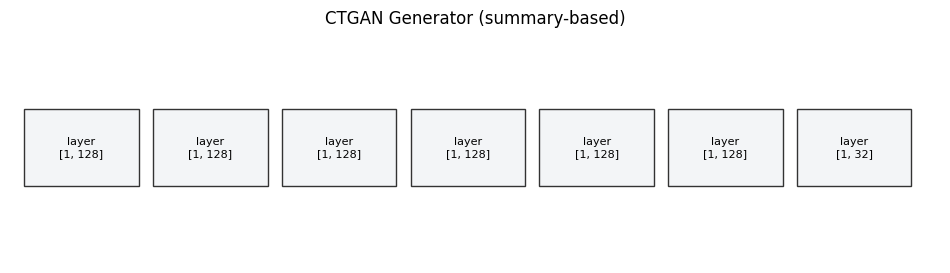

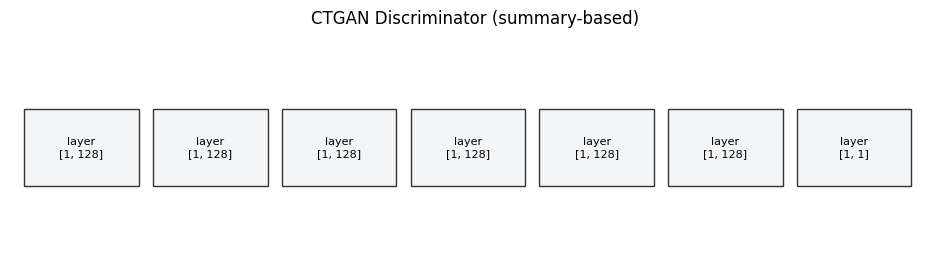

In [10]:
if summary is None:
    print('Install torchinfo to run summaries.')
else:
    noise_dim = 100
    data_dim = 32
    gen = CTGANGenerator(noise_dim, data_dim)
    disc = CTGANDiscriminator(data_dim)

    gen_sum = summary(gen, input_size=(1, noise_dim), verbose=0)
    disc_sum = summary(disc, input_size=(1, data_dim), verbose=0)

    display(gen_sum)
    display(disc_sum)

    plot_summary_flow(gen_sum, 'CTGAN Generator (summary-based)')
    plot_summary_flow(disc_sum, 'CTGAN Discriminator (summary-based)')


## Conditional WGAN-GP (Generator & Critic)

Layer (type:depth-idx)                   Output Shape              Param #
ConditionalGenerator                     [1, 32]                   --
├─Sequential: 1-1                        [1, 32]                   --
│    └─Linear: 2-1                       [1, 256]                  35,072
│    └─ReLU: 2-2                         [1, 256]                  --
│    └─Linear: 2-3                       [1, 256]                  65,792
│    └─ReLU: 2-4                         [1, 256]                  --
│    └─Linear: 2-5                       [1, 256]                  65,792
│    └─ReLU: 2-6                         [1, 256]                  --
│    └─Linear: 2-7                       [1, 32]                   8,224
│    └─Tanh: 2-8                         [1, 32]                   --
Total params: 174,880
Trainable params: 174,880
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.17
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.70
Estimated Total

Layer (type:depth-idx)                   Output Shape              Param #
PacDiscriminator                         [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 256]                  51,456
│    └─LeakyReLU: 2-2                    [1, 256]                  --
│    └─Linear: 2-3                       [1, 256]                  65,792
│    └─LeakyReLU: 2-4                    [1, 256]                  --
│    └─Linear: 2-5                       [1, 1]                    257
Total params: 117,505
Trainable params: 117,505
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.12
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.47
Estimated Total Size (MB): 0.48

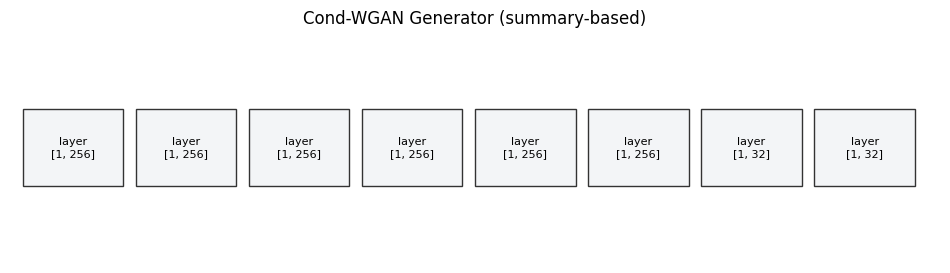

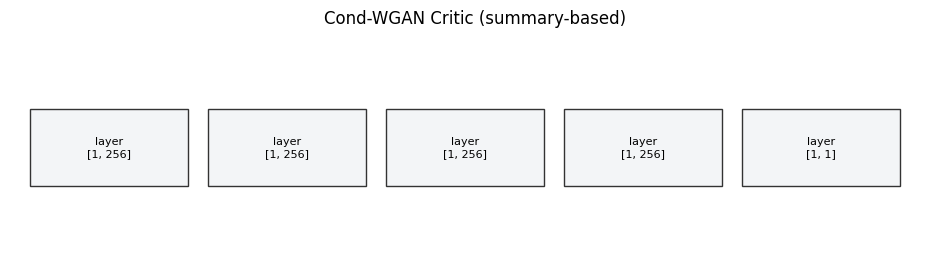

In [11]:
if summary is None:
    print('Install torchinfo to run summaries.')
else:
    noise_dim = 128
    cond_dim = 8
    data_dim = 32
    pac = 5

    gen = ConditionalGenerator(noise_dim, cond_dim, data_dim)
    critic = PacDiscriminator(data_dim, cond_dim, pac=pac)

    gen_sum = summary(gen, input_size=[(1, noise_dim), (1, cond_dim)], verbose=0)
    critic_sum = summary(critic, input_size=[(1, data_dim * pac), (1, cond_dim * pac)], verbose=0)

    display(gen_sum)
    display(critic_sum)

    plot_summary_flow(gen_sum, 'Cond-WGAN Generator (summary-based)')
    plot_summary_flow(critic_sum, 'Cond-WGAN Critic (summary-based)')


## Autoencoder

Layer (type:depth-idx)                   Output Shape              Param #
Autoencoder                              [1, 32]                   --
├─Sequential: 1-1                        [1, 32]                   --
│    └─Linear: 2-1                       [1, 128]                  4,224
│    └─ReLU: 2-2                         [1, 128]                  --
│    └─Linear: 2-3                       [1, 32]                   4,128
│    └─ReLU: 2-4                         [1, 32]                   --
├─Sequential: 1-2                        [1, 32]                   --
│    └─Linear: 2-5                       [1, 128]                  4,224
│    └─ReLU: 2-6                         [1, 128]                  --
│    └─Linear: 2-7                       [1, 32]                   4,128
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.07
Estimated Total Size

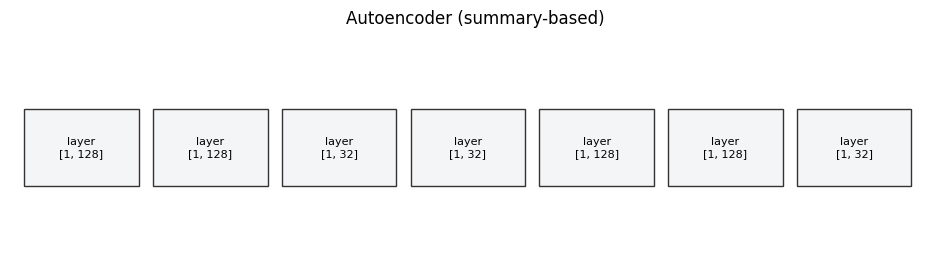

In [12]:
if summary is None:
    print('Install torchinfo to run summaries.')
else:
    input_dim = 32
    ae = Autoencoder(input_dim=input_dim, hidden_dim=128, latent_dim=32)
    ae_sum = summary(ae, input_size=(1, input_dim), verbose=0)
    display(ae_sum)
    plot_summary_flow(ae_sum, 'Autoencoder (summary-based)')
